In [25]:
import numpy as np 
from matplotlib import pyplot as plt
import pandas as pd

In [26]:
S_U = 10
S_R = 10/5
V_REF = 3.3
BIT_ADC = 10
f = 1338.53
T = 1/f 
voltages = [2.8,2.7,2.6,2.5,2.4,2.3,2.2,2.1,2.0,1.9,1.8,1.7,1.6,1.5,1.4]
resolutions = ["mode-1","mode-2","mode-3","mode-4","mode-5","mode-6","mode-7"]
voltages.reverse()
data_frames = [] 
data_frames_res = [] 

def calc_derived_value(data_frame):
    delta_voltage_analog = np.abs(data_frame[" value ch1"] - data_frame[" value ch0"])
    current_analog = delta_voltage_analog / S_U
    power_analog = current_analog * data_frame[" value ch2"]
    
    delta_digital_voltage = np.abs(data_frame[" value ch4"] - data_frame[" value ch3"])
    current_digital = delta_digital_voltage / S_R
    power_digital = current_digital * data_frame[" value ch2"] 
    
    delta_control_voltage = np.abs(data_frame[" value ch5"] - data_frame[" value ch6"])
    power_control = (delta_control_voltage/ S_R) * V_REF
    
    data_frame["power_analog"] = power_analog
    data_frame["power_digital"] = power_digital
    data_frame["power_total"] = power_analog + power_digital
    data_frame["power_control"] = power_control 
    
    return(data_frame)

for volt in voltages: 
    df = pd.read_csv( f"./data/{volt}.csv",skiprows=1)
    keys_values = list(filter(lambda x : "value" in x, df.keys()))
    keys_samples = list(filter(lambda x : "sample" in x, df.keys()))
    df[keys_values] = (df[keys_values] / (2**BIT_ADC))*V_REF
    df = calc_derived_value(df)
    data_frames.append(df)


#resolutions 
for res in resolutions: 
    df = pd.read_csv( f"./data/{res}.csv",skiprows=1)
    keys_values = list(filter(lambda x : "value" in x, df.keys()))
    keys_samples = list(filter(lambda x : "sample" in x, df.keys()))
    df[keys_values] = (df[keys_values] / (2**BIT_ADC))*V_REF
    df = calc_derived_value(df)
    data_frames_res.append(df)
    

In [27]:
average_power = []
std_power = []
average_analog = []
average_digital = [] 
for df in data_frames: 
    average_power.append(df["power_total"].mean())
    std_power.append((df["power_total"]*1000).std())
    average_analog.append(df["power_analog"].mean())
    average_digital.append(df["power_digital"].mean())

average_power = np.array(average_power)
average_analog = np.array(average_analog)
average_digital = np.array(average_digital)
std_power = np.array(std_power)

average_power_res = []
std_power_res = []
average_analog_res = []
average_digital_res = [] 
for df in data_frames_res: 
    average_power_res.append(df["power_total"].mean())
    std_power_res.append((df["power_total"]*1000).std())
    average_analog_res.append(df["power_analog"].mean())
    average_digital_res.append(df["power_digital"].mean())

average_power_res = np.array(average_power_res)
average_analog_res = np.array(average_analog_res)
average_digital_res = np.array(average_digital_res)
std_power_res = np.array(std_power_res)
    

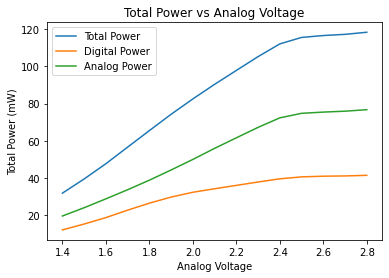

In [28]:
plt.title("Total Power vs Analog Voltage")
plt.xlabel("Analog Voltage")
plt.ylabel("Total Power (mW)")
plt.plot(voltages,average_power*1000, label='Total Power')
plt.plot(voltages,average_digital*1000, label='Digital Power')
plt.plot(voltages,average_analog*1000, label='Analog Power')
plt.legend()
plt.savefig("../data_set_analysis/figs/power_trends.png")
#plt.figsave("test.png")

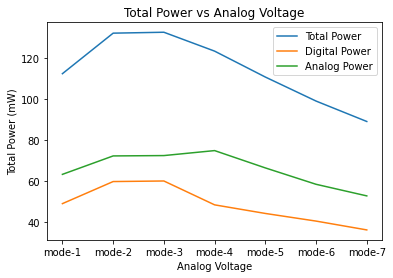

In [29]:
plt.title("Total Power vs Analog Voltage")
plt.xlabel("Analog Voltage")
plt.ylabel("Total Power (mW)")
plt.plot(resolutions,average_power_res*1000, label='Total Power')
plt.plot(resolutions,average_digital_res*1000, label='Digital Power')
plt.plot(resolutions,average_analog_res*1000, label='Analog Power')
plt.legend()
plt.savefig("../data_set_analysis/figs/power_trends_res.png")
#plt.figsave("test.png")

In [30]:
ref_power = average_power[-1] 
data_summary = []
data_summary.append(voltages)
data_summary.append(np.asarray(average_power)*1000)
data_summary.append(np.asarray(std_power))
data_summary.append(np.asarray((ref_power - average_power)*1000))
data_summary.append(np.asarray(((ref_power-average_power)/ref_power)*100))
data_summary = np.array(data_summary)
df_s = pd.DataFrame(np.transpose(data_summary),columns=["Analog Voltage","Average Power mW","Average Power STD","Delta from Reference Power mW","Percent Savings"])


In [31]:
df_s

Analog Voltage  Average Power mW  Average Power STD  \
0              1.4         31.971844          11.646486   
1              1.5         39.583839          14.381211   
2              1.6         47.772924          17.279823   
3              1.7         56.662783          20.616947   
4              1.8         65.524485          24.424534   
5              1.9         74.281662          28.543713   
6              2.0         82.511428          32.240650   
7              2.1         90.337558          35.906643   
8              2.2         97.791455          40.035979   
9              2.3        105.197454          44.325149   
10             2.4        112.026955          48.108693   
11             2.5        115.487728          49.019819   
12             2.6        116.508072          47.785380   
13             2.7        117.147585          46.588562   
14             2.8        118.273066          45.453048   

    Delta from Reference Power mW  Percent Savings  
0                       86.301222        72.967773  
1                       78.689227        66.531823  
2                       70.500142        59.607943  
3                       61.610283        52.091558  
4                       52.748581        44.598980  
5                       43.991404        37.194777  
6                       35.761638        30.236502  
7                       27.935508        23.619501  
8                       20.481611        17.317224  
9                       13.075612        11.055443  
10                       6.246111         5.281094  
11                       2.785338         2.355006  
12                       1.764994         1.492304  
13                       1.125481         0.951595  
14                       0.000000         0.000000

In [32]:
ref_power_res = average_power_res[-1] 
data_summary_res = []
data_summary_res.append(resolutions)
data_summary_res.append(np.asarray(average_power_res)*1000)
data_summary_res.append(np.asarray(std_power_res))
data_summary_res.append(np.asarray((ref_power_res - average_power_res)*1000))
data_summary_res.append(np.asarray(((ref_power_res-average_power_res)/ref_power_res)*100))
data_summary_res = np.array(data_summary_res)
df_s_res = pd.DataFrame(np.transpose(data_summary_res),columns=["Analog Voltage","Average Power mW","Average Power STD","Delta from Reference Power mW","Percent Savings"])


In [33]:
df_s_res

Analog Voltage    Average Power mW   Average Power STD  \
0         mode-1  112.50314456849082   42.12873482780069   
1         mode-2  132.27029763207423   41.15705005695018   
2         mode-3  132.71605404095638  40.896129659903195   
3         mode-4  123.50332288670525   46.27011420331416   
4         mode-5  110.86491635584817   45.87211074598893   
5         mode-6   99.14713084788305   43.03976335665374   
6         mode-7   89.18290974941237   36.44213142865845   

  Delta from Reference Power mW      Percent Savings  
0           -23.320234819078454  -26.148770974847128  
1           -43.087387882661865   -48.31350311817536  
2           -43.533144291544005   -48.81332579735755  
3            -34.32041313729288   -38.48317265463411  
4           -21.682006606435795   -24.31184031487452  
5            -9.964221098470672  -11.172792103855219  
6                           0.0                  0.0

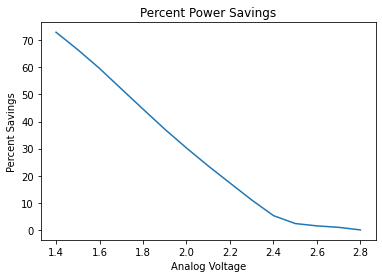

In [34]:
percent_power_saving = ((ref_power-average_power)/ref_power)*100
plt.title("Percent Power Savings")
plt.xlabel("Analog Voltage")
plt.ylabel("Percent Savings")
plt.plot(voltages,percent_power_saving)

In [35]:
data_frames[-1]["power_total"].mean()

0.11827306627435667

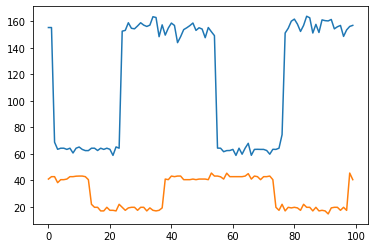

In [37]:
plt.plot(data_frames[-1]["power_total"][0:100]*1000)
plt.plot(data_frames[0]["power_total"][0:100]*1000)

In [22]:
keys = ["2.8","2.0","1.8","1.4"]
d = zip(map(str,df_s["Analog Voltage"]),zip(df_s["Average Power mW"],df_s["Average Power STD"]**2))

dicP = dict(d)

In [24]:
dicP

{'1.4': (31.97184409775719, 135.64063937538137),
 '1.5': (39.58383927898389, 206.81922805998676),
 '1.6': (47.77292435674655, 298.59228130399356),
 '1.7': (56.662782970762116, 425.05849935615356),
 '1.8': (65.5244847792147, 596.5578840999893),
 '1.9': (74.28166248908028, 814.7435750715532),
 '2.0': (82.5114279167174, 1039.4594804893763),
 '2.1': (90.33755836186393, 1289.287042438553),
 '2.2': (97.79145494327533, 1602.8796496596021),
 '2.3': (105.19745435085278, 1964.7188315160745),
 '2.4': (112.02695488414749, 2314.446328293533),
 '2.5': (115.48772794718724, 2402.9426288808013),
 '2.6': (116.50807224397641, 2283.4425610248936),
 '2.7': (117.1475853240965, 2170.4941479812974),
 '2.8': (118.27306627435667, 2065.979541162451)}